In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
figsize(15, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def loadframe(filename):
     # load data frame, and then set the date column to be the index.
     # temperatures are in celcius.
    df = pd.read_csv(filename, header=None);
    df = df.rename(columns={0:'date'});
    df.set_index(['date'], drop=True, inplace=True)
    df.index = df.index.tolist();
    return df
df = loadframe('./weather_data.csv')
df.iloc[0:5,0:5]

,1,2,3,4,5
1980-01-01,4,2,8,7,5
1980-01-02,5,4,9,6,4
1980-01-03,9,6,12,9,3
1980-01-04,6,3,9,9,0
1980-01-05,1,0,4,3,2


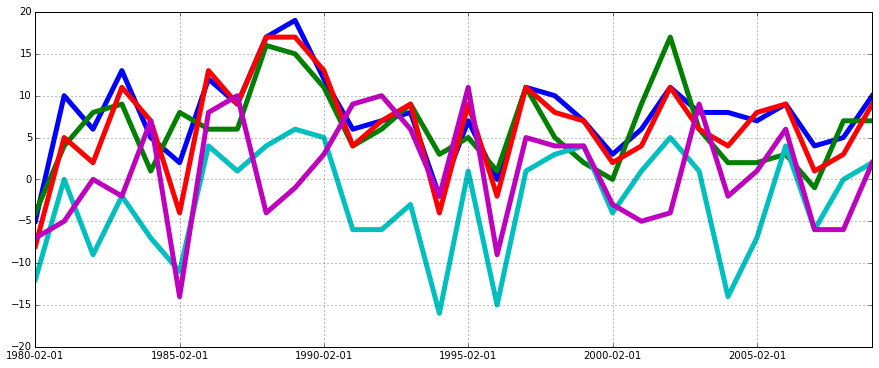

In [3]:
# plot 5 locations and their February 1st temperature over 30 years.
df.loc[filter(lambda x: x[-5:]=='02-01',df.index)].loc[:,filter(lambda x: x%100==1,df.columns)].plot(legend=False,linewidth=5)

In [4]:
# now compare the measured temperature to the Kalman-filtered temperature, for select locations on Februrary 1st
from kalman import Kalman1D
df2 = df.loc[filter(lambda x: x[-5:]=='02-01',df.index)].loc[:,filter(lambda x: x%100==1,df.columns)]  # select locations
for col in df2.columns:
      E = (df2[col].max() - df2[col].min())/2.0 # this is the approximation of the noise covariance
      kalman =  Kalman1D( A = np.matrix([1]), B = np.matrix([0]), H = np.matrix([1]), x0 = np.matrix([df2[col].iloc[0]]), 
                                    P0 = np.matrix([E]), Q = np.matrix([E]), R = np.matrix([E]) )
      for date in df2.index:
            kalman.update(np.matrix([0]),np.matrix([df2.loc[date,col]]))
            df2.loc[date,col] = kalman.current_state()[0]

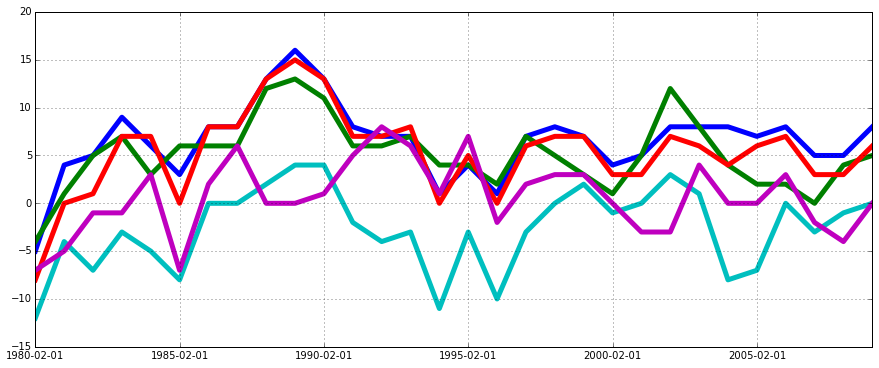

In [5]:
df2.plot(legend=False,linewidth=5)

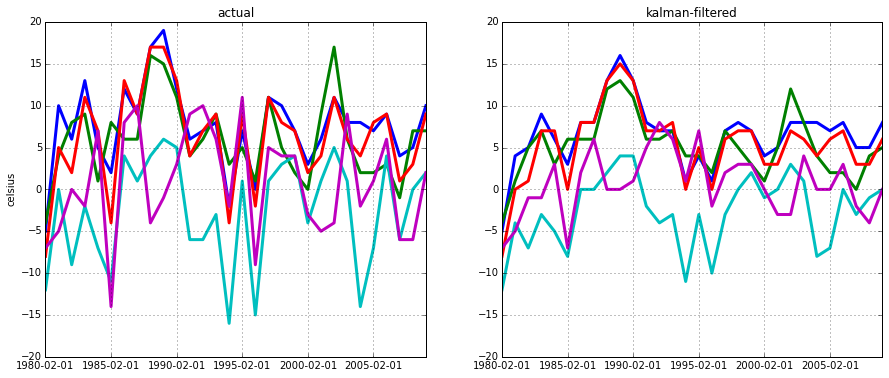

In [6]:
# now let's plot the measured and the kalman-filtered temperatures next to each other
fig, axs = plt.subplots(1,2)
df.loc[filter(lambda x: x[-5:]=='02-01',df.index)].loc[:,filter(lambda x: x%100==1,df.columns)].plot(ax=axs[0], legend=False, linewidth=3, title='actual').set_ylabel('celsius')
df2.plot(ax=axs[1], legend=False, linewidth=3, ylim=[-20,20], title='kalman-filtered')

In [14]:
predict = loadframe('./predict.csv')

In [8]:
xverr = loadframe('./xv.csv');
xverr_filtered = loadframe('./xv_filtered.csv');
# the cross-validation adventage of filtering prior to training, in %
print '%0.2f' % (( xverr.sum(axis=0).sum() - xverr_filtered.sum(axis=0).sum() ) / xverr.sum(axis=0).sum() * 100.0) + '% cross-validation gain from filtering'; 

9.09% cross-validation gain from filtering


In [10]:
testerr = loadframe('./test.csv');
testerr_filtered = loadframe('./test_filtered.csv');
# the test adventage of filtering prior to training, in %
print '%0.2f' % (( testerr.sum(axis=0).sum() - testerr_filtered.sum(axis=0).sum() ) / testerr.sum(axis=0).sum() * 100.0) + '% test adventage from filtering'; 

7.65% test adventage from filtering


In [12]:
# mean difference per date-location in celcius
print '%0.2f' % (testerr_filtered.sum(axis=0).sum() / testerr_filtered.size) + ' degrees Celsius in mean residual'

3.46 degrees Celsius in mean residual


In [16]:
# now what if I simply take the average of the first 29 years to predict the 30th year?  what would be mean residual be?
# in addition, would filtering help in my prediction?
testerr_simpleavg = loadframe('./test_simpleavg.csv');
testerr_simpleavg_filtered = loadframe('./test_simpleavg_filtered.csv');
print '%0.2f' % (testerr_simpleavg.sum(axis=0).sum() / testerr_simpleavg.size) + ' degrees Celsius in mean residual'
print '%0.2f' % (testerr_simpleavg_filtered.sum(axis=0).sum() / testerr_simpleavg_filtered.size) + ' degrees Celsius in mean residual'

2.58 degrees Celsius in mean residual
2.63 degrees Celsius in mean residual
